In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="poster")

import pickle

from sklearn.model_selection import train_test_split

from jcopml.plot import plot_confusion_matrix

# import model

In [2]:
model = pickle.load(open(r"model_xgb.pkl", 'rb'))

# import dataset

In [3]:
df = pd.read_csv("../Datasets/heart.csv")

Q1 = df["trestbps"].quantile(0.25) #membuat Q1
Q3 = df["trestbps"].quantile(0.75) #membuat Q3

IQR = Q3 - Q1 #menghitung IQR
print(f"IQR = {IQR}\nQ1 = {Q1}\nQ3 = {Q3}")

batas_bawah = Q1-(1.5*IQR)
batas_atas = Q3+(1.5*IQR)

print(f"batas bawah: {batas_bawah}\nbatas atas: {batas_atas}")

df = df[(df["trestbps"]>=batas_bawah) & (df["trestbps"]<=batas_atas)] #filter outlier
df.reset_index(drop=True, inplace=True) #reset index

X = df.drop(columns="target", axis="columns")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

IQR = 20.0
Q1 = 120.0
Q3 = 140.0
batas bawah: 90.0
batas atas: 170.0


((235, 13), (59, 13), (235,), (59,))

# import datatest

In [4]:
dataTest = pd.read_feather("../Datasets/other_dataset.feather")

In [5]:
dataTest = dataTest[(dataTest["trestbps"]>=batas_bawah) & (dataTest["trestbps"]<=batas_atas)] #filter outlier
dataTest.reset_index(drop=True, inplace=True) #reset index

In [6]:
X_dataTest = dataTest.drop(columns="target", axis="columns").copy()
y_dataTest = dataTest["target"].copy()

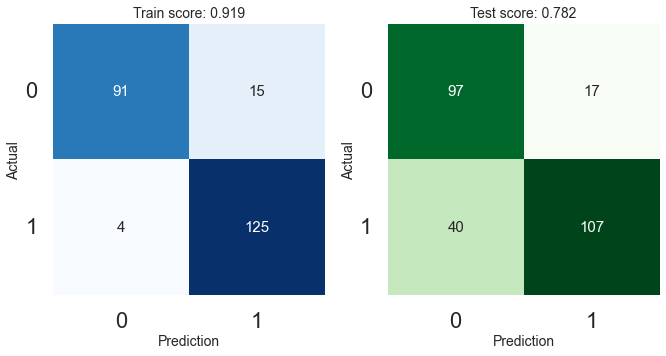

In [7]:
plot_confusion_matrix(X_train, y_train, X_dataTest, y_dataTest, model)

In [8]:
dataTest["hasil_prediksi"] = model.predict(X_dataTest)

In [9]:
#dataTest.to_feather("../Datasets/other_dataset_hasil.feather")

In [10]:
dataTest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hasil_prediksi
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,0,0
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,1,1
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,0,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,1,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,48,1,1,110,229,0,0,168,0,1.0,2,0,3,0,1
257,44,1,1,120,263,0,0,173,0,0.0,0,0,3,1,1
258,56,0,1,140,294,0,2,153,0,1.3,1,0,1,1,1
259,57,1,3,140,192,0,0,148,0,0.4,1,0,2,1,1
